# DNN Model to Clasify Garbage using Keras

## 1. Import required libraries
- os to navigate the file system
- getcwd to get the current working directory
- tensorflow for Training the model
- shutil to copy the file for train-test split

In [1]:
import os
from os import getcwd
import tensorflow as tf
import random
import shutil
from shutil import copyfile

## 2. Direct to the Source directories

In [2]:
os.chdir(getcwd() + '/Dataset')
path = getcwd()
SOURCE_DIR = path + '/source/'
cardboard = SOURCE_DIR + '/cardboard/'
glass = SOURCE_DIR + '/glass/'
metal = SOURCE_DIR + '/metal/'
paper = SOURCE_DIR + '/paper/'
plastic = SOURCE_DIR + '/plastic/'
trash = SOURCE_DIR + '/trash/'

## 3. Creating the required directories (for training and testing)

In [3]:
os.chdir(path)
try : 
    os.mkdir(path + '/training/')
    os.mkdir(path + '/training/cardboard_training/')
    os.mkdir(path + '/training/glass_training/')
    os.mkdir(path + '/training/metal_training/')
    os.mkdir(path + '/training/paper_training/')
    os.mkdir(path + '/training/plastic_training/')
    os.mkdir(path + '/training/trash_training/')

    os.mkdir(path + '/testing/')
    os.mkdir(path + '/testing/cardboard_testing/')
    os.mkdir(path + '/testing/glass_testing/')
    os.mkdir(path + '/testing/metal_testing/')
    os.mkdir(path + '/testing/paper_testing/')
    os.mkdir(path + '/testing/plastic_testing/')
    os.mkdir(path + '/testing/trash_testing/')

except OSError:
    pass

TRAINING_DIR = path + '/training/'
TESTING_DIR = path + '/testing/'

- Some info on the dataset files

In [4]:
print('total training cardboard images:', len(os.listdir(cardboard)))
print('total training glass images:', len(os.listdir(glass)))
print('total training metal images:', len(os.listdir(metal)))
print('total training paper images:', len(os.listdir(paper)))
print('total training plastic images:', len(os.listdir(plastic)))
print('total training trash images:', len(os.listdir(trash)))




cardboard_files = os.listdir(cardboard)
print(cardboard_files[:10])

glass_files = os.listdir(glass)
print(glass_files[:10])

metal_files = os.listdir(metal)
print(metal_files[:10])

paper_files = os.listdir(paper)
print(paper_files[:10])

plastic_files = os.listdir(plastic)
print(plastic_files[:10])

trash_files = os.listdir(trash)
print(trash_files[:10])

total training cardboard images: 401
total training glass images: 501
total training metal images: 410
total training paper images: 594
total training plastic images: 482
total training trash images: 137
['cardboard1.jpg', 'cardboard10.jpg', 'cardboard100.jpg', 'cardboard101.jpg', 'cardboard102.jpg', 'cardboard103.jpg', 'cardboard104.jpg', 'cardboard105.jpg', 'cardboard106.jpg', 'cardboard107.jpg']
['glass1.jpg', 'glass10.jpg', 'glass100.jpg', 'glass101.jpg', 'glass102.jpg', 'glass103.jpg', 'glass104.jpg', 'glass105.jpg', 'glass106.jpg', 'glass107.jpg']
['metal1.jpg', 'metal10.jpg', 'metal100.jpg', 'metal101.jpg', 'metal102.jpg', 'metal103.jpg', 'metal104.jpg', 'metal105.jpg', 'metal106.jpg', 'metal107.jpg']
['paper1.jpg', 'paper10.jpg', 'paper100.jpg', 'paper101.jpg', 'paper102.jpg', 'paper103.jpg', 'paper104.jpg', 'paper105.jpg', 'paper106.jpg', 'paper107.jpg']
['plastic1.jpg', 'plastic10.jpg', 'plastic100.jpg', 'plastic101.jpg', 'plastic102.jpg', 'plastic103.jpg', 'plastic104.jpg', 

## 4. Performing Train-Test split (90% - 10%)

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    random.sample(SOURCE, len(SOURCE))
    interIndex = int(SPLIT_SIZE * len(os.listdir(SOURCE)))
    
    
    for file in os.listdir(SOURCE)[:interIndex]:
        try:
            copyfile(SOURCE + file, TRAINING + file)
        except:
            continue
        
    for file in os.listdir(SOURCE)[interIndex:]:
        try:
            copyfile(SOURCE + file, TESTING + file)
        except:
            continue

    return

CARDBOARD_SOURCE_DIR = cardboard
TRAINING_CARDBOARD_DIR = TRAINING_DIR + "/cardboard_training/"
TESTING_CARDBOARD_DIR = TESTING_DIR + "/cardboard_testing/"

GLASS_SOURCE_DIR = glass
TRAINING_GLASS_DIR = TRAINING_DIR + "/glass_training/"
TESTING_GLASS_DIR = TESTING_DIR + "/glass_testing/"

METAL_SOURCE_DIR = metal
TRAINING_METAL_DIR = TRAINING_DIR + "/metal_training/"
TESTING_METAL_DIR = TESTING_DIR + "/metal_testing/"

PAPER_SOURCE_DIR = paper
TRAINING_PAPER_DIR = TRAINING_DIR + "/paper_training/"
TESTING_PAPER_DIR = TESTING_DIR + "/paper_testing/"

PLASTIC_SOURCE_DIR = plastic
TRAINING_PLASTIC_DIR = TRAINING_DIR + "/plastic_training/"
TESTING_PLASTIC_DIR = TESTING_DIR + "/plastic_testing/"

TRASH_SOURCE_DIR = trash
TRAINING_TRASH_DIR = TRAINING_DIR + "/trash_training/"
TESTING_TRASH_DIR = TESTING_DIR + "/trash_testing/"

split_size = .9 # change this to change ratio of train-test split
split_data(CARDBOARD_SOURCE_DIR, TRAINING_CARDBOARD_DIR, TESTING_CARDBOARD_DIR, split_size)
split_data(GLASS_SOURCE_DIR, TRAINING_GLASS_DIR, TESTING_GLASS_DIR, split_size)
split_data(METAL_SOURCE_DIR, TRAINING_METAL_DIR, TESTING_METAL_DIR, split_size)
split_data(PAPER_SOURCE_DIR, TRAINING_PAPER_DIR, TESTING_PAPER_DIR, split_size)
split_data(PLASTIC_SOURCE_DIR, TRAINING_PLASTIC_DIR, TESTING_PLASTIC_DIR, split_size)
split_data(TRASH_SOURCE_DIR, TRAINING_TRASH_DIR, TESTING_TRASH_DIR, split_size)

## 5. Model Training and Testing
- Creating a ImageDataGenerator to rescale and input a variety of distinct images from the given dataset to train the model better.
- reducing image size to 150x150 (x3 rgb)  
  
**Model**:
- 3 - 2D convolutional layers followed by 2D Maxpooling.
- Flattening the image into a array.
- An additional hidden layer and a output layer of size 6, for 6 classes of garbage.
- model summary provided.

In [8]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = TRAINING_DIR
training_datagen = ImageDataGenerator(
      rescale = 1. / 255.,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

VALIDATION_DIR = TESTING_DIR
validation_datagen = ImageDataGenerator(rescale = 1. / 255.)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 10
    
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

history = model.fit(train_generator, epochs = 50, steps_per_epoch = 20, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 2269 images belonging to 6 classes.
Found 256 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________________________

20/20 [==============================] - 12s 603ms/step - loss: 1.2588 - acc: 0.5250 - val_loss: 1.2319 - val_acc: 0.5156
Epoch 48/50
20/20 [==============================] - 11s 567ms/step - loss: 1.3291 - acc: 0.5150 - val_loss: 1.1829 - val_acc: 0.6055
Epoch 49/50
20/20 [==============================] - 12s 614ms/step - loss: 1.3216 - acc: 0.4874 - val_loss: 1.5957 - val_acc: 0.4102
Epoch 50/50
20/20 [==============================] - 13s 631ms/step - loss: 1.4452 - acc: 0.4700 - val_loss: 1.1960 - val_acc: 0.5391


## 6. Model Visiualiztion
- plot of train and test accuracy and losses

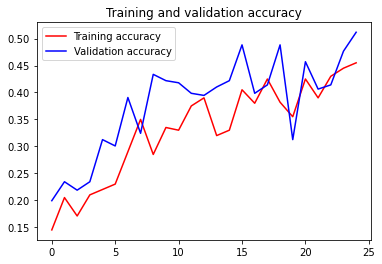

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()